In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap


In [ ]:
# Load California Housing dataset
data = fetch_california_housing(as_frame=True)  # Load it as a DataFrame

# Explore the first few rows
print(data.frame.head())

# Check basic statistics
print(data.frame.describe())

# Check feature names
print(data.feature_names)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

In [ ]:
# Select 'MedInc' (median income) as the feature and 'MedHouseVal' (house value) as the target
X = data.frame[['MedInc']]
y = data.frame['MedHouseVal']

print(X.head())  # Preview the selected feature
print(y.head())  # Preview the target


   MedInc
0  8.3252
1  8.3014
2  7.2574
3  5.6431
4  3.8462
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")


Training set size: 16512, Test set size: 4128


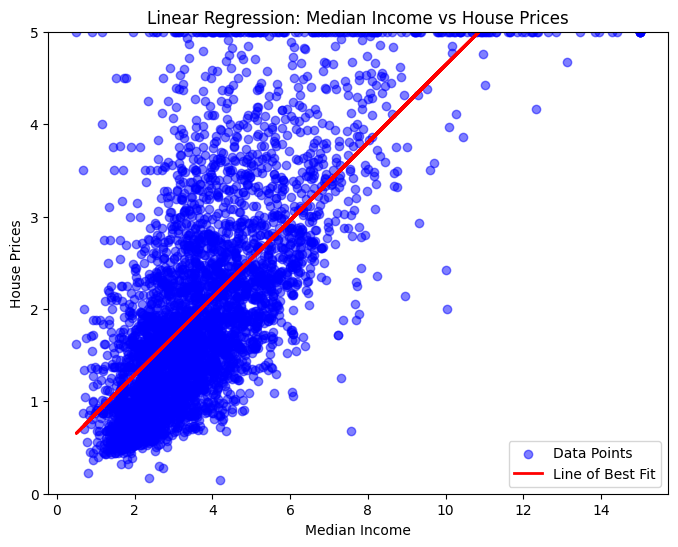

In [ ]:
# Train the Linear Regression model
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot data points and the line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Line of Best Fit')
plt.ylim(0, 5)  # Cap y-axis at 5
plt.xlabel('Median Income')
plt.ylabel('House Prices')
plt.title('Linear Regression: Median Income vs House Prices')
plt.legend()
plt.show()


In [ ]:
# Scale the training and test features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train the Ridge Regression model
ridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Calculate MSE for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge:.4f}')


Ridge Regression MSE: 0.7091


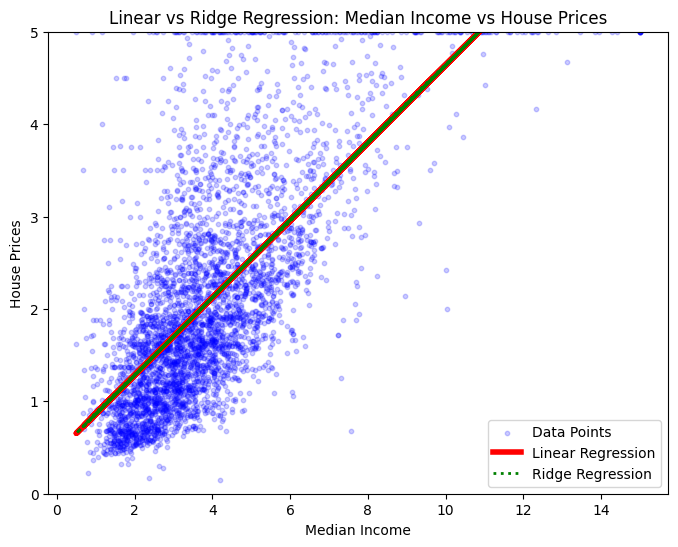

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot with reduced marker size and transparency
plt.scatter(X_test, y_test, color='blue', alpha=0.2, s=10, label='Data Points')

# Linear Regression line (red, solid)
plt.plot(X_test, y_pred, color='red', linewidth=4, label='Linear Regression')

# Ridge Regression line (green, dashed)
plt.plot(X_test, y_pred_ridge, color='green', linestyle='dotted', linewidth=2, label='Ridge Regression')

# Set axis limits and labels
plt.ylim(0, 5)  # Cap y-axis at 5
plt.xlabel('Median Income')
plt.ylabel('House Prices')
plt.title('Linear vs Ridge Regression: Median Income vs House Prices')
plt.legend()
plt.show()


In [ ]:
# Load Iris dataset
iris = load_iris(as_frame=True)

# Explore the first few rows
print(iris.frame.head())

# Check feature names
print(iris.feature_names)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Select the first two features for easy 2D plotting
X = iris.data[['sepal length (cm)', 'sepal width (cm)']]
y = iris.target

print(X.head())  # Preview features
print(y.head())  # Preview target labels


   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [ ]:
# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Train K-Nearest Neighbors model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5).fit(X_scaled, y)


In [ ]:
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


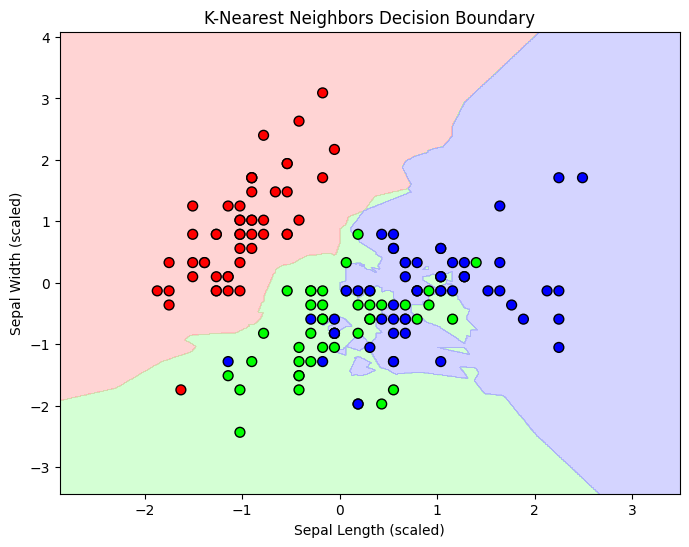

In [ ]:
# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']),
            edgecolor='k', s=50)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-Nearest Neighbors Decision Boundary')
plt.show()
